In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import gc
from sklearn.model_selection import train_test_split

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
class Flags():
    export=True
    out_path = 'assets/0.1/'
flags = Flags()

In [3]:
reduced = pd.read_csv(flags.out_path + 'dataset_reduced.csv')
d = reduced.describe()
d.to_latex(flags.out_path+'EDA_dataset_stats.tex')
d

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.000000,73746.00000
mean,56.310546,14.633951,2875.511401,488.406118,397.607239,9.767801,1.680485,280.238496,277.289123,281.183401,299.454578,299.925404,292.190922,290.819947,519.685806,522.053015,530.097525,420.195400,425.311356,430.059340,421.074212,65.050235,2.32587
std,5.168000,6.810139,1210.671402,90.760317,9.716167,0.387554,0.069079,29.575492,30.093384,28.543786,2.571829,3.630710,30.267872,28.715490,130.693648,127.470346,149.668383,91.465574,84.295532,89.746306,84.829400,1.121240,1.12931
min,42.740000,1.310000,0.027463,241.773000,376.250000,8.753372,1.519830,175.781000,175.824000,176.469000,292.195000,286.713174,191.132000,185.962000,149.451600,211.314000,126.334000,162.402333,167.114000,156.267000,175.439000,62.050000,0.60000
25%,52.670000,8.940000,2081.402500,432.055250,394.336000,9.527063,1.648070,250.301000,250.488000,250.862000,298.274000,298.078000,267.348349,256.867250,416.883500,441.954500,411.603750,356.648250,357.684000,358.472750,356.645500,64.360000,1.44000
50%,56.080000,13.850000,3019.630000,504.536500,399.299000,9.798440,1.697550,299.346000,296.255000,298.710000,299.804000,299.892951,299.487000,298.990000,491.791000,495.967000,494.243000,412.228000,408.948000,425.312500,411.335000,65.210000,1.99000
75%,59.720000,19.600000,3725.922500,553.262750,403.008000,10.037800,1.728150,300.151000,300.725000,300.400000,300.634000,301.804000,303.149000,301.919000,593.958750,594.817750,600.697750,485.199750,484.485750,492.835250,477.368750,65.870000,3.00000
max,65.780000,33.400000,6294.220939,739.504000,418.640000,10.807987,1.853207,370.580000,375.293000,364.346000,305.859000,309.811000,370.899000,371.549000,861.934000,828.778000,886.818408,680.187000,675.506377,698.816000,659.621000,68.010000,5.53000


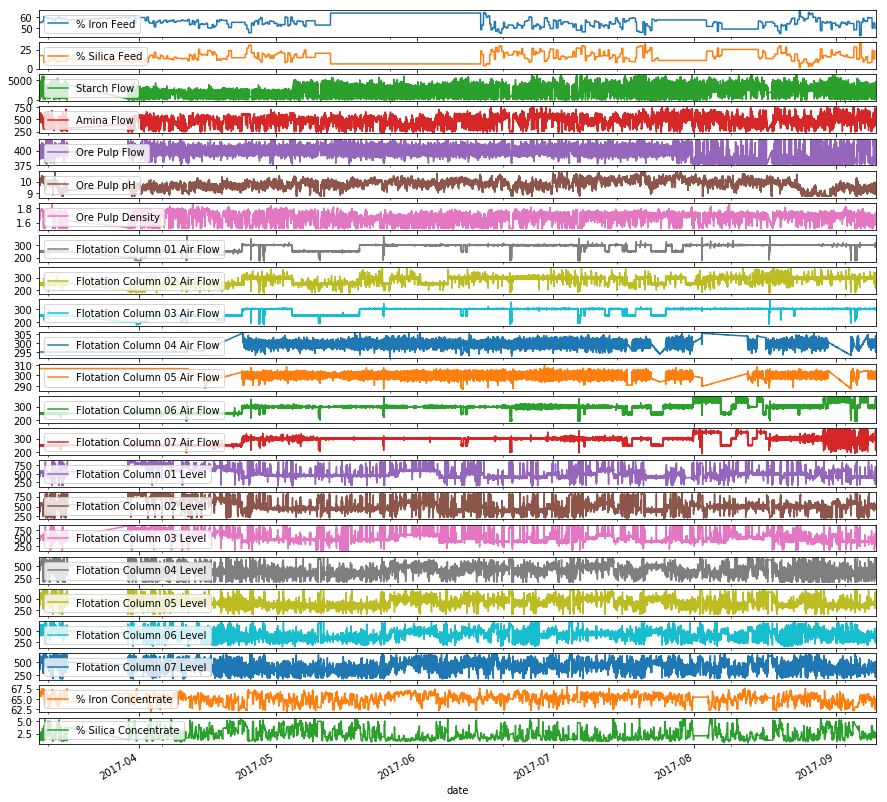

In [4]:
reduced['date'] = pd.to_datetime (reduced['date'], utc=True)
reduced = reduced.set_index(reduced['date'])
reduced = reduced.drop ('date', axis=1)

Axis = reduced.plot(subplots=True, sharex=True, figsize=(15,15))
for k in range(0,reduced.shape[1]-1,1):
    Axis[k].legend(loc='upper left')
plt.savefig(flags.out_path + 'EDA_temporal.eps', bbox_inches='tight')

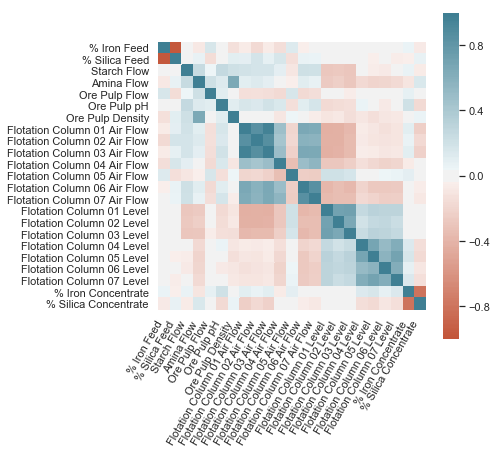

In [5]:
corr = reduced.corr(method='pearson')
corr.to_latex(flags.out_path+'table_correlation.tex')
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
);
plt.savefig(flags.out_path + 'EDA_correlation.eps', bbox_inches='tight')

In [6]:
print('Two most interesting variables:')
corr['% Silica Concentrate'].sort_values()[:4]

Two most interesting variables:


% Iron Concentrate             -0.800747
Flotation Column 01 Air Flow   -0.227679
Flotation Column 03 Air Flow   -0.226388
Flotation Column 02 Air Flow   -0.174486
Name: % Silica Concentrate, dtype: float64

In [7]:
# Scatter matrix ("all vs all"), with KDE diagonal
#pd.plotting.scatter_matrix(raw, alpha=0.9, figsize=(10, 10), diagonal='kde')
#plt.show()

In [8]:
# As 6 variáveis com maior correlação, separando '% Silica Concentrate' pela mediana 
#threshold=raw['% Silica Concentrate']>2.3

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
#ax1.scatter(raw['Amina Flow'], raw['Flotation Column 01 Air Flow'],c=threshold, cmap='rainbow', alpha=0.4)
#ax2.scatter(raw['Ore Pulp pH'], raw['Flotation Column 05 Level'],c=threshold, cmap='rainbow', alpha=0.4)
#ax3.scatter(raw['% Iron Concentrate'], raw['Flotation Column 06 Level'],c=threshold, cmap='rainbow', alpha=0.4)